# EDA - Emergency Event Database

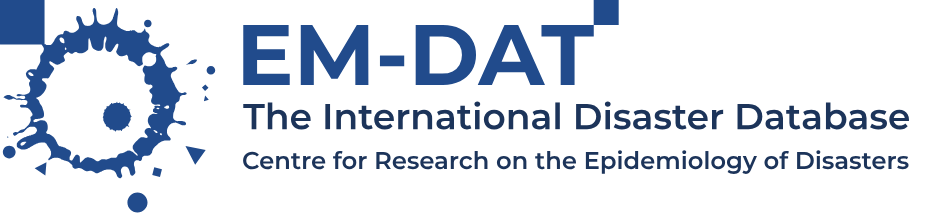

**I. Identify dataset: Columns**
* Year: The year in which the disaster occurred.
* Country: The country where the disaster occurred.
* Disaster Subtype: The type of disaster (e.g., flood, earthquake, storm, drought).
* Number of Disasters: The total number of disasters that occurred in a given year for a specific country and disaster subtype.
* Total Affected: The total number of people affected by the disaster in a given year for a specific country and disaster subtype.
* Total Deaths: The total number of deaths resulting from the disaster in a given year for a specific country and disaster subtype.
* Total Economic Losses (Original): The total economic losses resulting from the disaster, in the original currency of the country, in a given year for a specific country and disaster subtype.
* Total Economic Losses (Adjusted): The total economic losses resulting from the disaster, adjusted for inflation and expressed in 2019 US dollars, in a given year for a specific country and disaster subtype.
* Consumer Price Index from OCDE 

The dataset contains multiple rows of data for each combination of year, country, and disaster subtype, spanning from 1900 to 2022. The dataset has a total of 47,682 rows and 8 columns.

*Source: The dataset is sourced from the Centre for Research on the Epidemiology of Disasters (CRED), which is part of the University of Louvain in Brussels, Belgium.*

**II. Identify Business Problem**

Healthcare organizations can analyze historical data from the EM-DAT dataset to identify regions that are more susceptible to specific types of natural disasters. By doing so, they can establish early warning systems that alert them to the potential outbreak of diseases that often follow these disasters. For example, flooding can lead to waterborne diseases, while wildfires can lead to respiratory issues.

**Problem : EDA & identifying regions that are susceptible to specific types of natural disasters**

In [24]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import geopandas as gpd

### Pre-Processing :
* Missing values
* Outliers
* Duplicates 
* Type

In [2]:
# ignoring warnings
warnings.filterwarnings('ignore')
# importing data
df = pd.read_excel("_Emergency+Events+Database+-+Country+Profiles_emdat-country-profiles_2023_04_06.xlsx")

In [3]:
df.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000,NaN,NaN,2.849084
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000,NaN,NaN,2.849084
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300,NaN,NaN,2.849084
4,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30,NaN,NaN,2.849084


In [4]:
# Visualising the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10432 entries, 0 to 10431
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          10432 non-null  object 
 1   Country                       10432 non-null  object 
 2   ISO                           10432 non-null  object 
 3   Disaster Group                10432 non-null  object 
 4   Disaster Subroup              10432 non-null  object 
 5   Disaster Type                 10432 non-null  object 
 6   Disaster Subtype              8299 non-null   object 
 7   Total Events                  10432 non-null  object 
 8   Total Affected                7587 non-null   object 
 9   Total Deaths                  7376 non-null   object 
 10  Total Damage (USD, original)  3834 non-null   float64
 11  Total Damage (USD, adjusted)  3831 non-null   object 
 12  CPI                           10380 non-null  float64
dtypes

There are several values that doesn"t have the correct dytpe format. For instance, the columns "Total Events", "Total Affected", "Total Deaths", "Total Damage" sould be numerical. Same for "year"

In [5]:
# Quick View
df.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000,NaN,NaN,2.849084
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000,NaN,NaN,2.849084
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300,NaN,NaN,2.849084
4,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30,NaN,NaN,2.849084


In [6]:
#Shape
print("The dataset contains", df.shape[0],"rows and", df.shape[1], "features")

# Dealing with missing values
miss_values = df.isnull().sum().sum()
print("Number of missing values :", miss_values)

# Dealing with duplicates
duplicated = df.duplicated().sum()
print("Number of duplicated values: :", duplicated)

# Drop CPI & Total Damage (original)
df = df.drop(columns=['Total Damage (USD, original)','CPI'])

# Summary Table
summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = df.isnull().sum().values    
summary['Uniques'] = df.nunique().values
summary

The dataset contains 10432 rows and 13 features
Number of missing values : 21285
Number of duplicated values: : 0


,Name,dtypes,Missing,Uniques
0,Year,object,0,125
1,Country,object,0,226
2,ISO,object,0,226
3,Disaster Group,object,0,2
4,Disaster Subroup,object,0,6
5,Disaster Type,object,0,14
6,Disaster Subtype,object,2133,26
7,Total Events,object,0,20
8,Total Affected,object,2845,4044
9,Total Deaths,object,3056,816


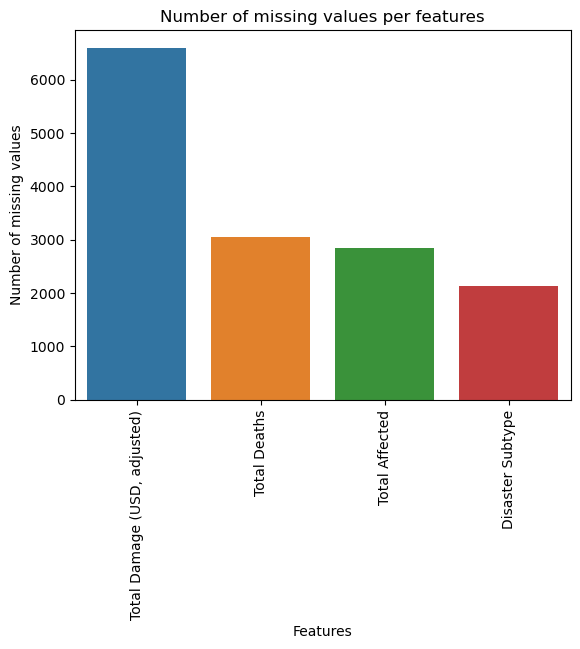

In [7]:
#Visualising the missing values per columns
nul_col = df.columns[df.isnull().any()] #gathering null columns
data_null = df[nul_col].isnull().sum().sort_values(ascending = False) #summing and sorting values

# Create a barplot from the Series
sns.barplot(x=data_null.index, y=data_null.values)

# Labels to the axes
plt.xlabel('Features')
plt.ylabel('Number of missing values')

# Rotate the x-axis labels 
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Number of missing values per features')

# Show the plot
plt.show()

It can be seen that the features with the most missing values are those that record the estimate of total damages, followed by total deaths, affected totals and subtype disasters. #We're not going to use CPI and Total Damage (Original), we would have the adjusted total damage in dollars

In [8]:
# Drop first row with # at the beginning
df_01 = df.iloc[1:, :]

# changing the type of columns that are supposed to be numerical
df_01[['Total Events', 'Total Affected','Total Deaths','Total Damage (USD, adjusted)']] = df_01[['Total Events', 'Total Affected','Total Deaths','Total Damage (USD, adjusted)']].apply(pd.to_numeric)

# Checking back
numerics = ['int64','float64']
df_01_num = df_01.select_dtypes(include=numerics)
#df_01_num.info()

# checking summary metrics
df_01_num.describe()

,Total Events,Total Affected,Total Deaths,"Total Damage (USD, adjusted)"
count,10431.000000,7.586000e+03,7.375000e+03,3.830000e+03
mean,1.446649,1.125969e+06,3.107711e+03,1.748704e+09
std,1.246589,9.760891e+06,7.255589e+04,9.115319e+09
min,1.000000,1.000000e+00,1.000000e+00,2.469000e+03
25%,1.000000,1.200000e+03,6.000000e+00,2.020927e+07
50%,1.000000,1.141400e+04,2.300000e+01,1.469247e+08
75%,1.000000,1.193045e+05,9.000000e+01,7.847767e+08
max,20.000000,3.300000e+08,3.700000e+06,2.732184e+11


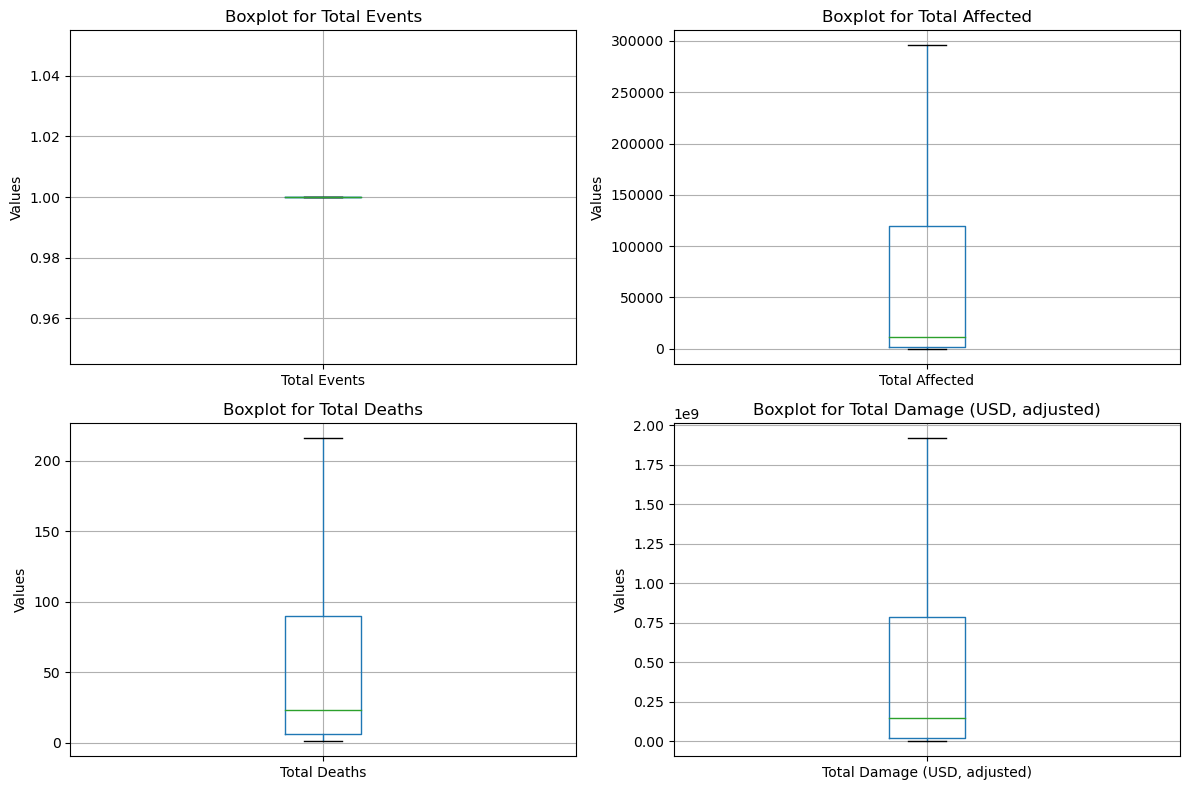

In [9]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the 2x2 array of subplots for easier indexing
axes = axes.flatten()

# Loop through numerical columns and create box plots in each subplot
for i, column in enumerate(df_01_num):
    df_01_num[[column]].boxplot(showfliers=False, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_ylabel('Values')
    axes[i].tick_params(axis='x')

# Ensure proper layout
plt.tight_layout()

# Show the plots
plt.show()

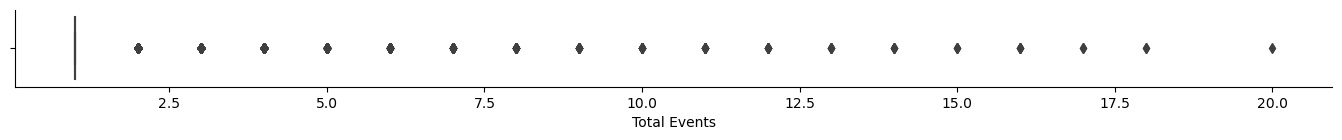

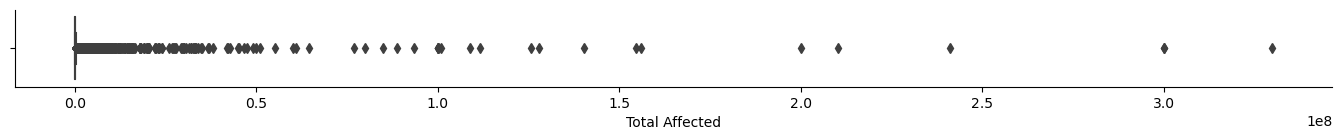

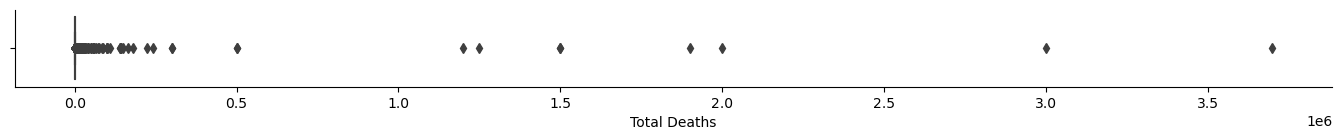

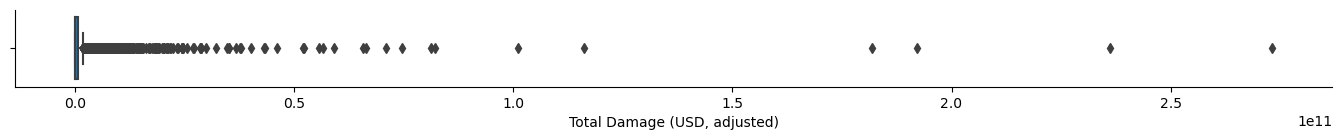

In [10]:
for column in df_01_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_01_num, x=column)
        sns.despine()

In the total events column, for example, we find values higher than the normal 1. In fact, the event that took place took place on average 1 or 2 times, but given that the maximum is 20, this means that one or more events occurred several times. Nevertheless, there are no missing values in this column. 

The same applies to Total Affected & Total Deaths & Total Damage, which vary according to the nature of the event and are naturally highly correlated.  These columns present missing values, so we have 2 choices: either we use the median to inpute missing values or winsorisation

In [11]:
#replacing missing values
## For object column
df_01["Disaster Subtype"] = df_01["Disaster Subtype"].fillna("No information")

## For numerical columns
for column in ["Total Affected", "Total Deaths", "Total Damage (USD, adjusted)"]:
    median_value = df_01[column].median()
    df_01[column].fillna(median_value, inplace=True)
    
print("Number of missing values :", df_01.isnull().sum().sum())

Number of missing values : 0


### Visualization

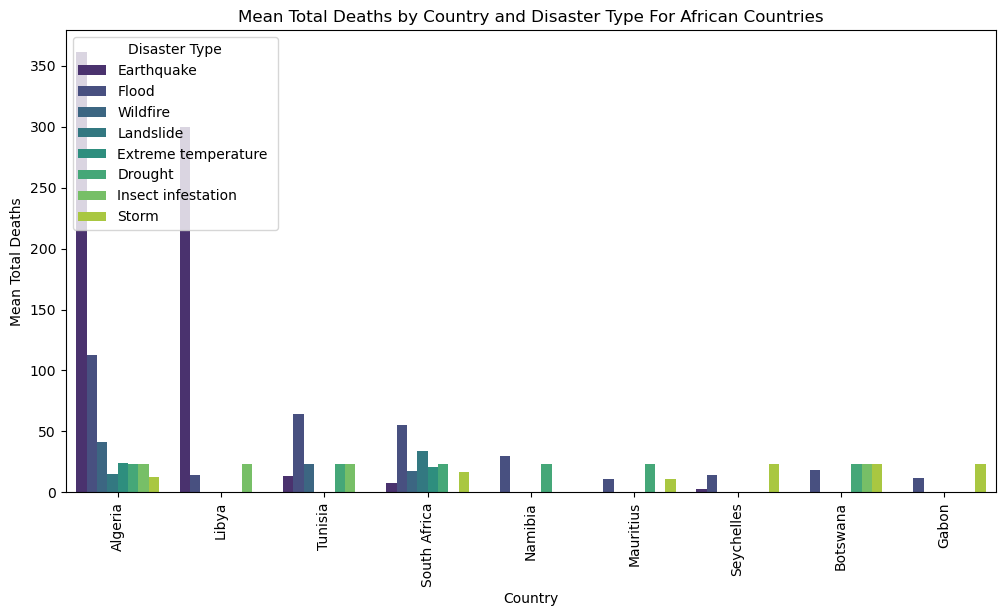

In [100]:
# Identifying Disaster Types by region who kills the most
Disaster_types_kills = df_01.groupby(["Country","Disaster Type", "Total Deaths"]).mean().sort_values(by="Total Deaths",ascending=False)

# Create a list of selected countries for each continent
african_countries = [
    "Seychelles",
    "Mauritius",
    "Botswana",
    "Gabon",
    "South Africa",
    "Namibia",
    "Equatorial Guinea",
    "Libya",
    "Tunisia",
    "Algeria",
]

asian_countries = [
    "Qatar",
    "Singapore",
    "Brunei",
    "China",
    "United Arab Emirates",
    "Kuwait",
    "Saudi Arabia",
    "Hong Kong",
    "Bahrain",
    "South Korea",
    "Japan",
]

european_countries = [
    "Luxembourg",
    "Norway",
    "Switzerland",
    "Ireland",
    "Iceland",
    "Denmark",
    "Sweden",
    "Netherlands",
    "Austria",
    "Germany",
]

north_american_countries = [
    "United States of America (the)",
    "Canada",
    "Bermuda",
    "Cayman Islands",
    "Saint Kitts and Nevis",
    "Antigua and Barbuda",
    "The Bahamas",
    "Puerto Rico",
    "Trinidad and Tobago",
    "Aruba",
]

oceania_countries = [
    "Australia",
    "New Zealand",
    "Fiji",
    "Palau",
    "Papua New Guinea",
    "Solomon Islands",
    "Vanuatu",
    "Tonga",
    "Samoa",
    "Marshall Islands",
]

south_american_countries = [
    "Chile",
    "Argentina",
    "Uruguay",
    "Brazil",
    "Colombia",
    "Ecuador",
    "Peru",
    "Venezuela",
    "Guyana",
    "Suriname",
]

# Subset the DataFrame by the selected countries
africa_subset_df = df_01[df_01['Country'].isin(african_countries)]
asia_subset_df = df_01[df_01['Country'].isin(asian_countries)]
european_subset_df = df_01[df_01['Country'].isin(european_countries)]
na_subset_df = df_01[df_01['Country'].isin(north_american_countries)]
oceanian_subset_df = df_01[df_01['Country'].isin(oceania_countries)]
sa_subset_df = df_01[df_01['Country'].isin(south_american_countries)]

# Group the data for the subset DataFrame
grouped_data = africa_subset_df.groupby(["Country", "Disaster Type"])['Total Deaths'].mean().reset_index()
grouped_data = grouped_data.sort_values(by="Total Deaths", ascending=False)

# Create the African bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Country", y="Total Deaths", hue="Disaster Type", palette="viridis")
plt.ylabel("Mean Total Deaths")
plt.title("Mean Total Deaths by Country and Disaster Type For African Countries")
plt.xticks(rotation=90)
plt.legend(title="Disaster Type")
plt.show()

In [98]:
top_countries

Country
China                             3.322052e+09
India                             2.483166e+09
Bangladesh                        4.700598e+08
Philippines (the)                 2.588768e+08
Pakistan                          1.327252e+08
United States of America (the)    1.174715e+08
Brazil                            1.158771e+08
Ethiopia                          1.132933e+08
Thailand                          1.121452e+08
Viet Nam                          9.854565e+07
Name: Total Affected, dtype: float64

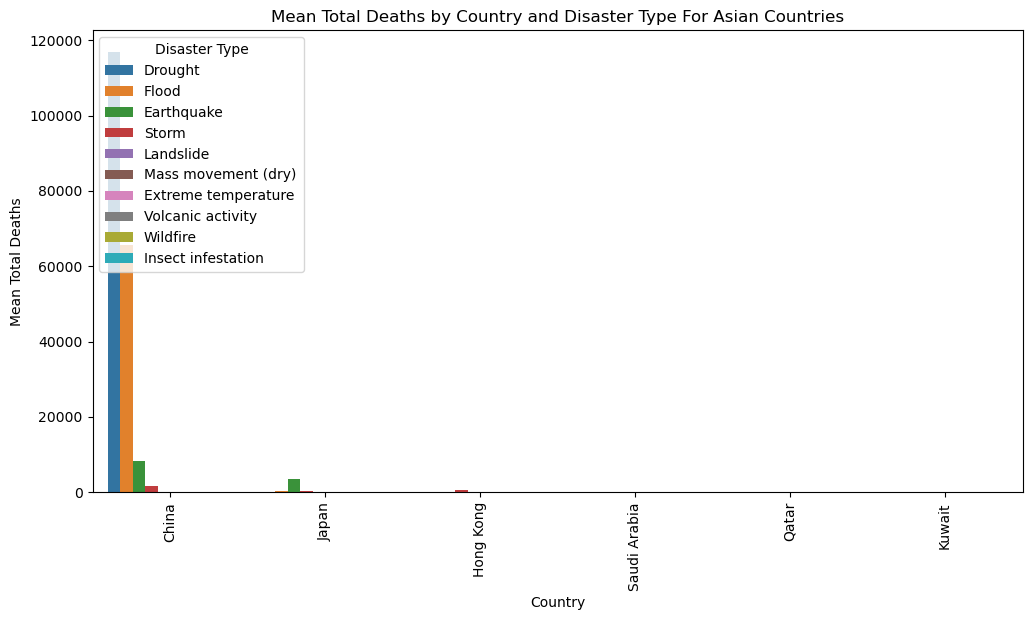

In [86]:
# Group the data for the subset DataFrame
grouped_data = asia_subset_df.groupby(["Country", "Disaster Type"])['Total Deaths'].mean().reset_index()
grouped_data = grouped_data.sort_values(by="Total Deaths", ascending=False)

# Create the Asian bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Country", y="Total Deaths", hue="Disaster Type")
plt.ylabel("Mean Total Deaths")
plt.title("Mean Total Deaths by Country and Disaster Type For Asian Countries")
plt.xticks(rotation=90)
plt.legend(title="Disaster Type")
plt.show()

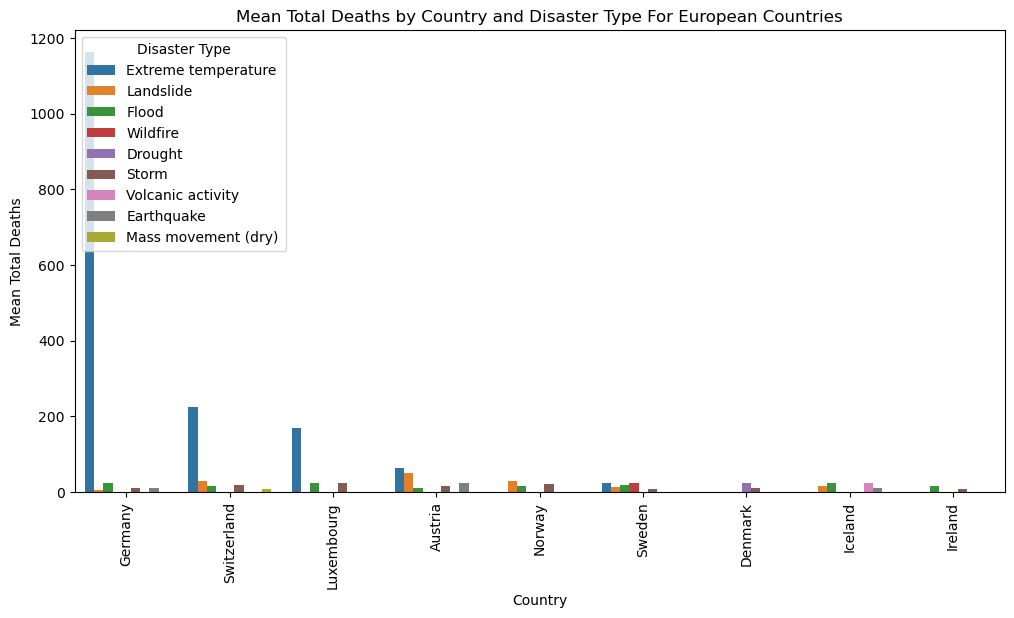

In [89]:
# Group the data for the subset DataFrame
grouped_data = european_subset_df.groupby(["Country", "Disaster Type"])['Total Deaths'].mean().reset_index()
grouped_data = grouped_data.sort_values(by="Total Deaths", ascending=False)

# Create the European bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Country", y="Total Deaths", hue="Disaster Type")
plt.ylabel("Mean Total Deaths")
plt.title("Mean Total Deaths by Country and Disaster Type For European Countries")
plt.xticks(rotation=90)
plt.legend(title="Disaster Type")
plt.show()

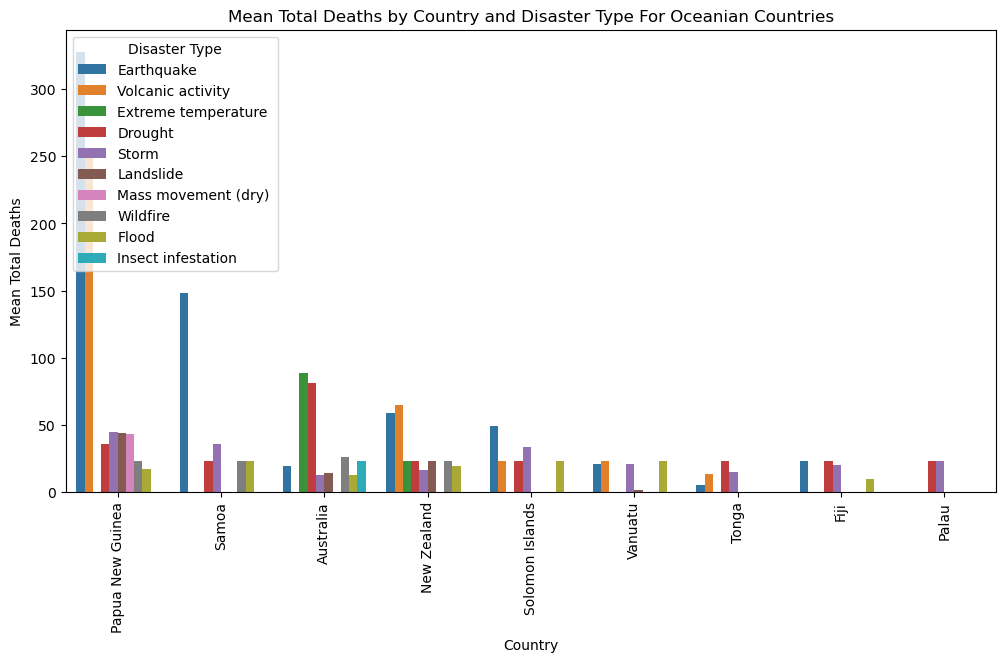

In [91]:
# Group the data for the subset DataFrame
grouped_data = oceanian_subset_df.groupby(["Country", "Disaster Type"])['Total Deaths'].mean().reset_index()
grouped_data = grouped_data.sort_values(by="Total Deaths", ascending=False)

# Create the Oceanian bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Country", y="Total Deaths", hue="Disaster Type")
plt.ylabel("Mean Total Deaths")
plt.title("Mean Total Deaths by Country and Disaster Type For Oceanian Countries")
plt.xticks(rotation=90)
plt.legend(title="Disaster Type")
plt.show()

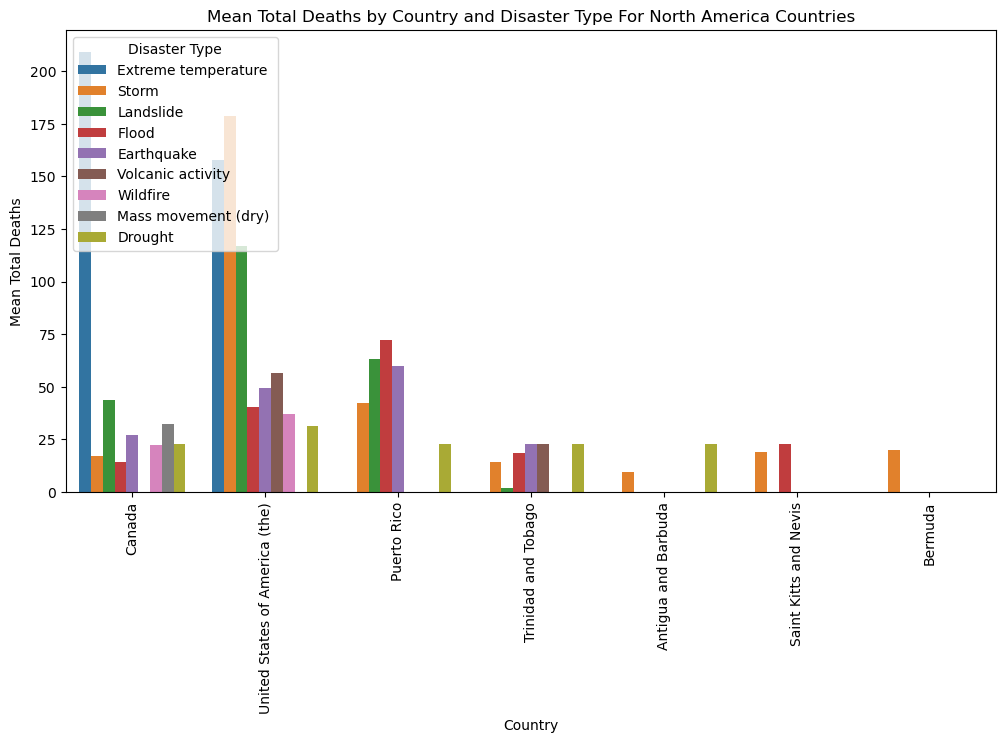

In [101]:
# Group the data for the subset DataFrame
grouped_data = na_subset_df.groupby(["Country", "Disaster Type"])['Total Deaths'].mean().reset_index()
grouped_data = grouped_data.sort_values(by="Total Deaths", ascending=False)

# Create the North America bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Country", y="Total Deaths", hue="Disaster Type")
plt.ylabel("Mean Total Deaths")
plt.title("Mean Total Deaths by Country and Disaster Type For North America Countries")
plt.xticks(rotation=90)
plt.legend(title="Disaster Type")
plt.show()

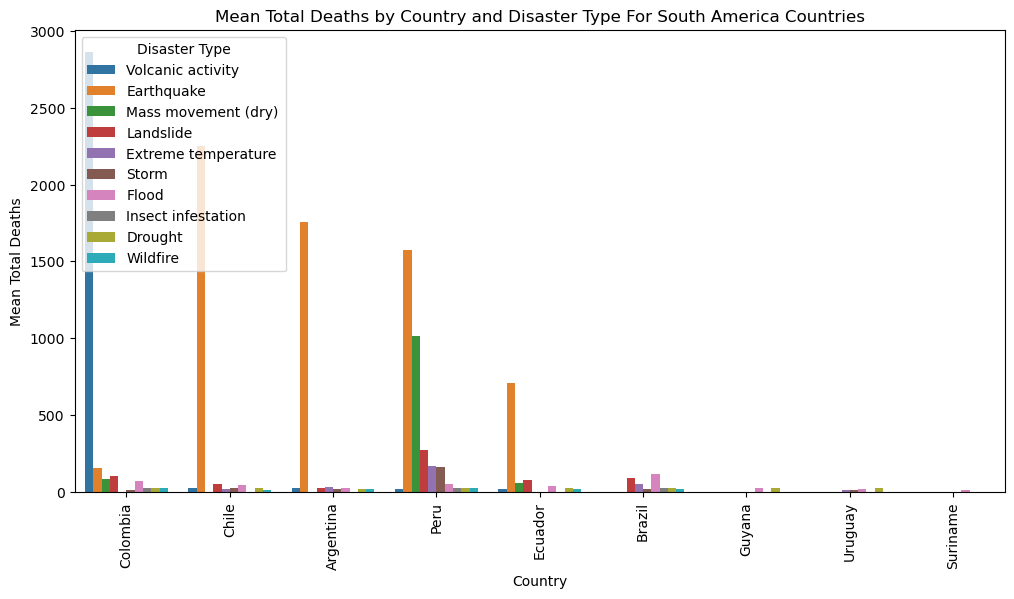

In [99]:
# Group the data for the subset DataFrame
grouped_data = sa_subset_df.groupby(["Country", "Disaster Type"])['Total Deaths'].mean().reset_index()
grouped_data = grouped_data.sort_values(by="Total Deaths", ascending=False)

# Create the South America bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x="Country", y="Total Deaths", hue="Disaster Type")
plt.ylabel("Mean Total Deaths")
plt.title("Mean Total Deaths by Country and Disaster Type For South America Countries")
plt.xticks(rotation=90)
plt.legend(title="Disaster Type")
plt.show()

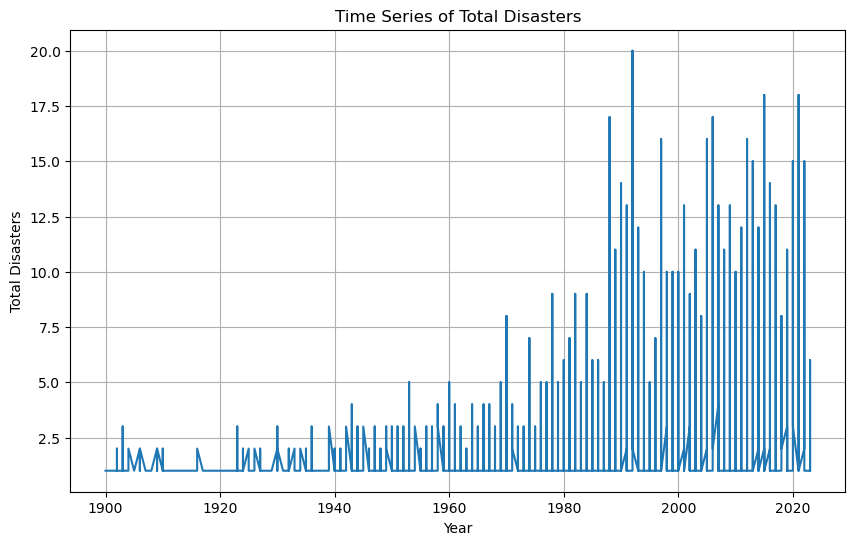

In [12]:
# Time Series
plt.figure(figsize=(10, 6))
plt.plot(df_01['Year'], df_01['Total Events'])
plt.xlabel('Year')
plt.ylabel('Total Disasters')
plt.title('Time Series of Total Disasters')
plt.grid(True)
plt.show()

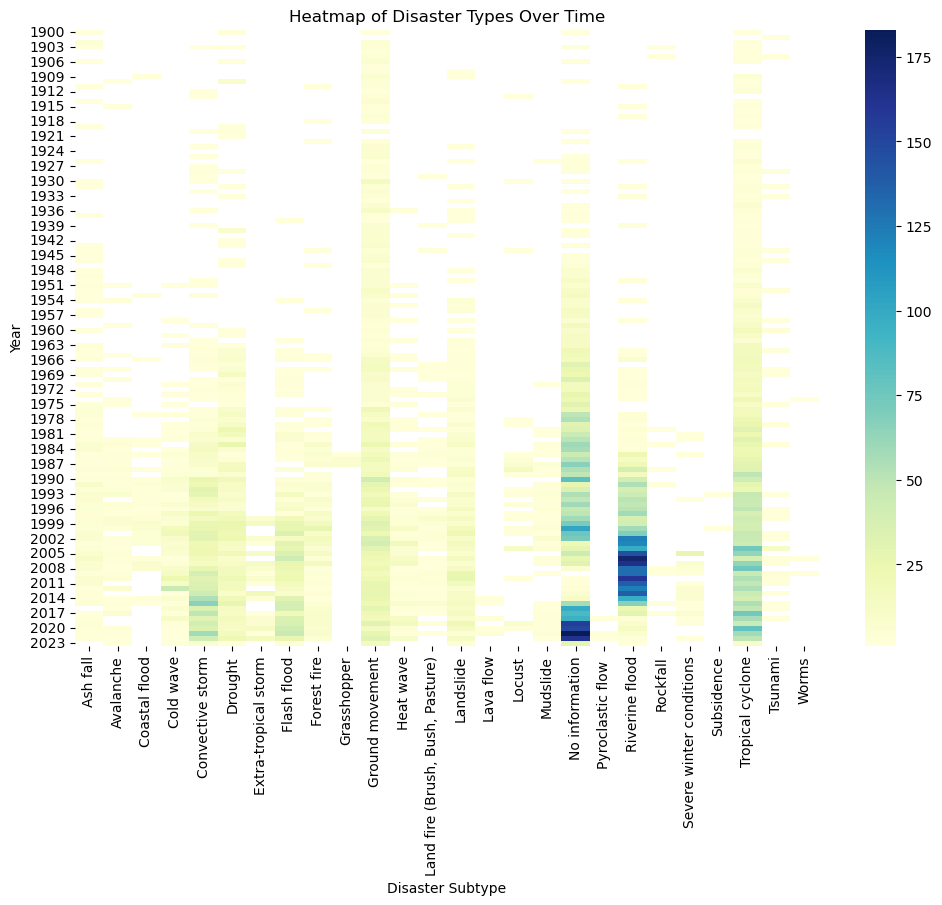

In [13]:
# Heatmap
pivot_table = df_01.pivot_table(index='Year', columns='Disaster Subtype', values='Total Events', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Disaster Types Over Time')
plt.show()

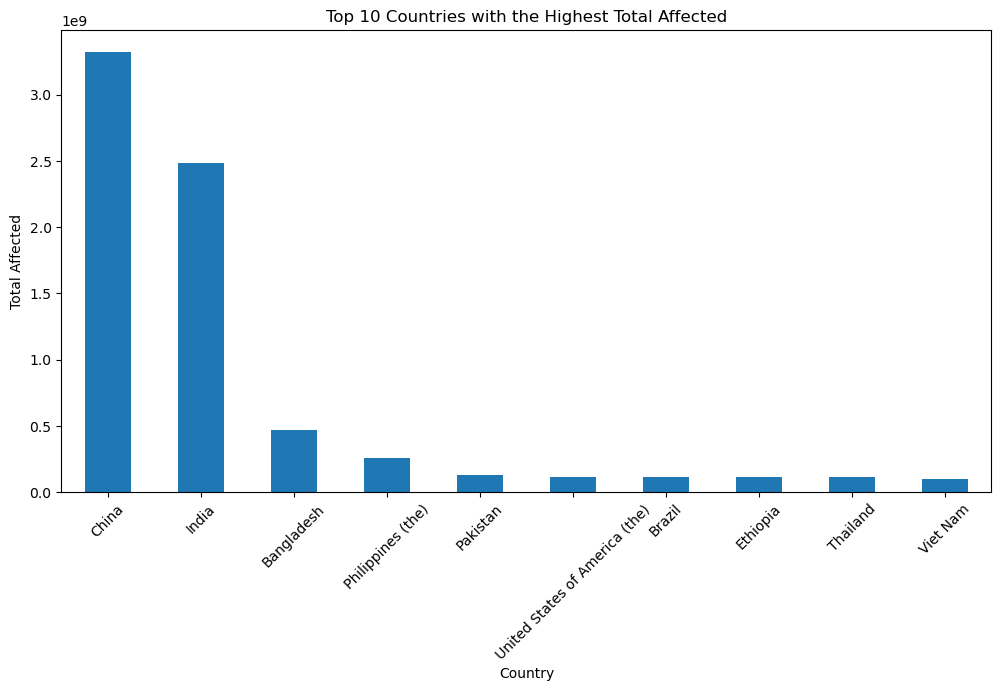

In [14]:
# Top 10 countries with highest total affected
top_countries = df_01.groupby('Country')['Total Affected'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Affected')
plt.title('Top 10 Countries with the Highest Total Affected')
plt.xticks(rotation=45)
plt.show()

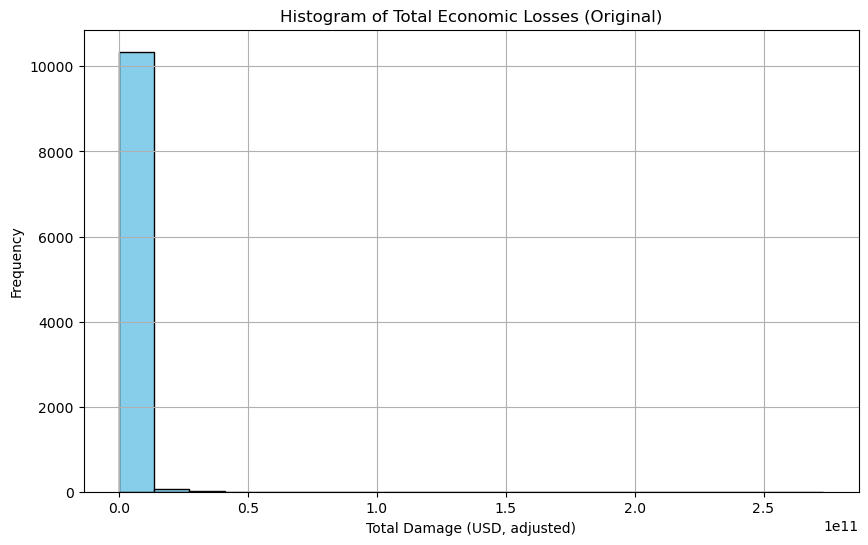

In [15]:
# Highest total economic losses
plt.figure(figsize=(10, 6))
plt.hist(df_01['Total Damage (USD, adjusted)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Damage (USD, adjusted)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Damage')
plt.grid(True)
plt.show()

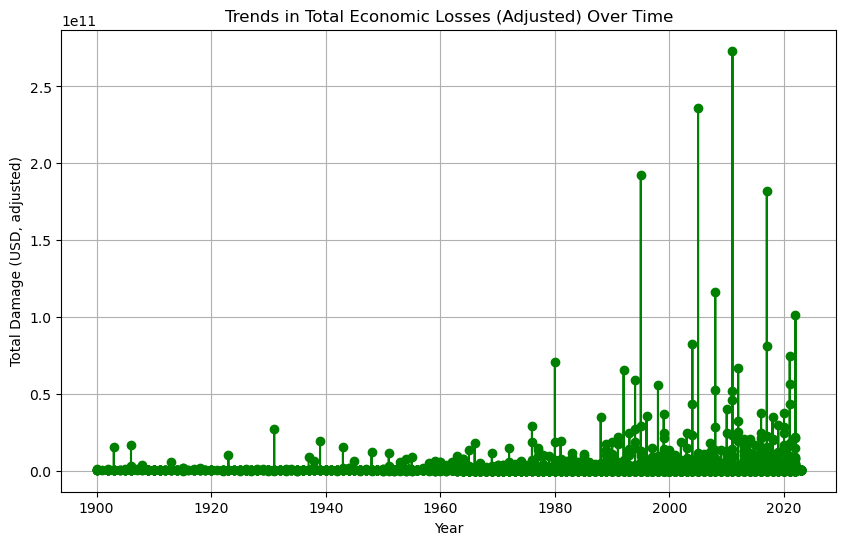

In [16]:
# Trends in total Economic losses over time
plt.plot(df_01['Year'], df_01['Total Damage (USD, adjusted)'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Total Damage (USD, adjusted)')
plt.title('Trends in Total Damage (Adjusted) Over Time')
plt.grid(True)
plt.show()

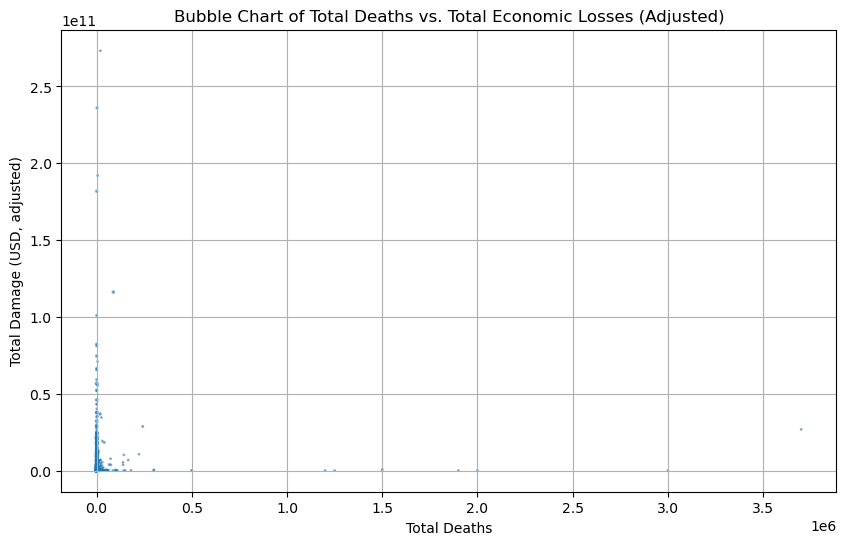

In [17]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df_01['Total Deaths'], df_01['Total Damage (USD, adjusted)'], s=np.sqrt(df_01['Total Events']), alpha=0.5)
plt.xlabel('Total Deaths')
plt.ylabel('Total Damage (USD, adjusted)')
plt.title('Bubble Chart of Total Deaths vs. Total Economic Losses (Adjusted)')
plt.grid(True)
plt.show()

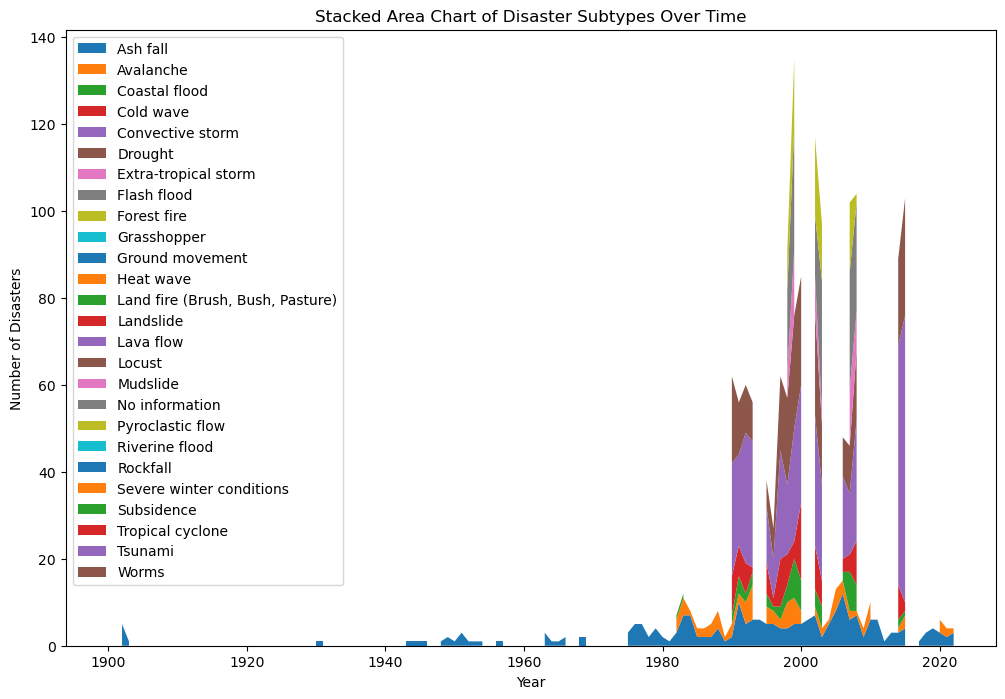

In [45]:
# Stacked Area chart of disaster subtypes
# Pivot the data for stacked area chart
pivot_table = df_01.pivot_table(index='Year', columns='Disaster Subtype', values='Total Events', aggfunc='sum')

# Create the stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(pivot_table.index, pivot_table.values.T, labels=pivot_table.columns)
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Stacked Area Chart of Disaster Subtypes Over Time')
plt.legend(loc='upper left')
plt.show()

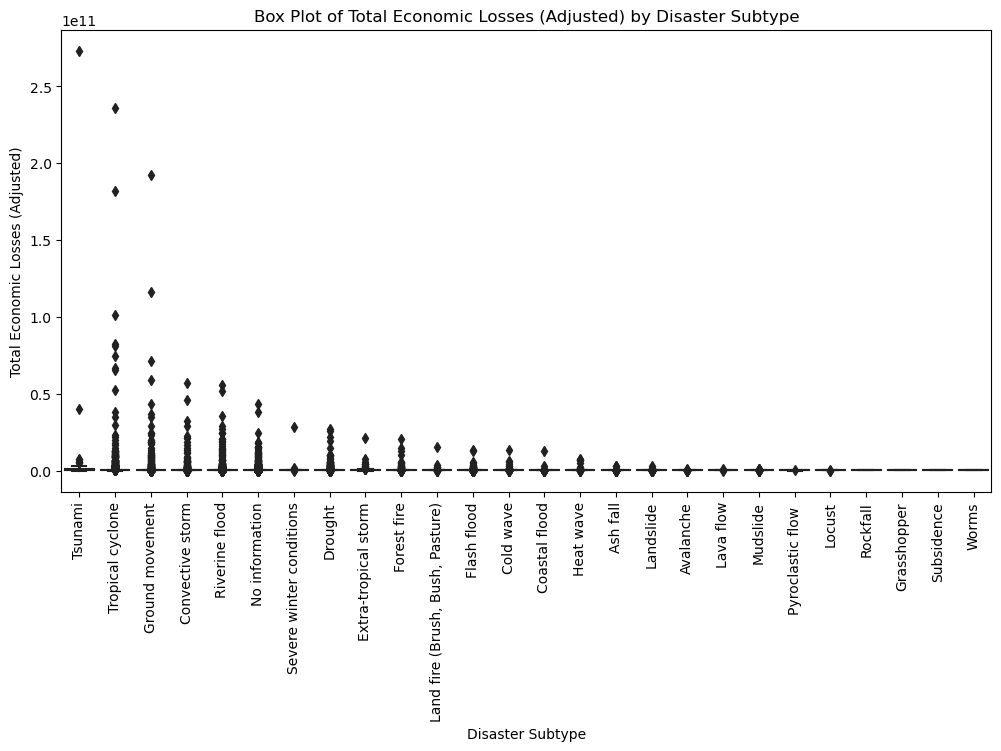

In [43]:
# Sort Economic losses
df_01 = df_01.sort_values(by='Total Damage (USD, adjusted)', ascending=False)


#Boxplot of Total Economic Losses by Disaster Subtype
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_01, x='Disaster Subtype', y='Total Damage (USD, adjusted)', palette='viridis')
plt.ylabel('Total Economic Losses (Adjusted)')
plt.title('Box Plot of Total Economic Losses (Adjusted) by Disaster Subtype')
plt.xticks(rotation=90)
plt.show()

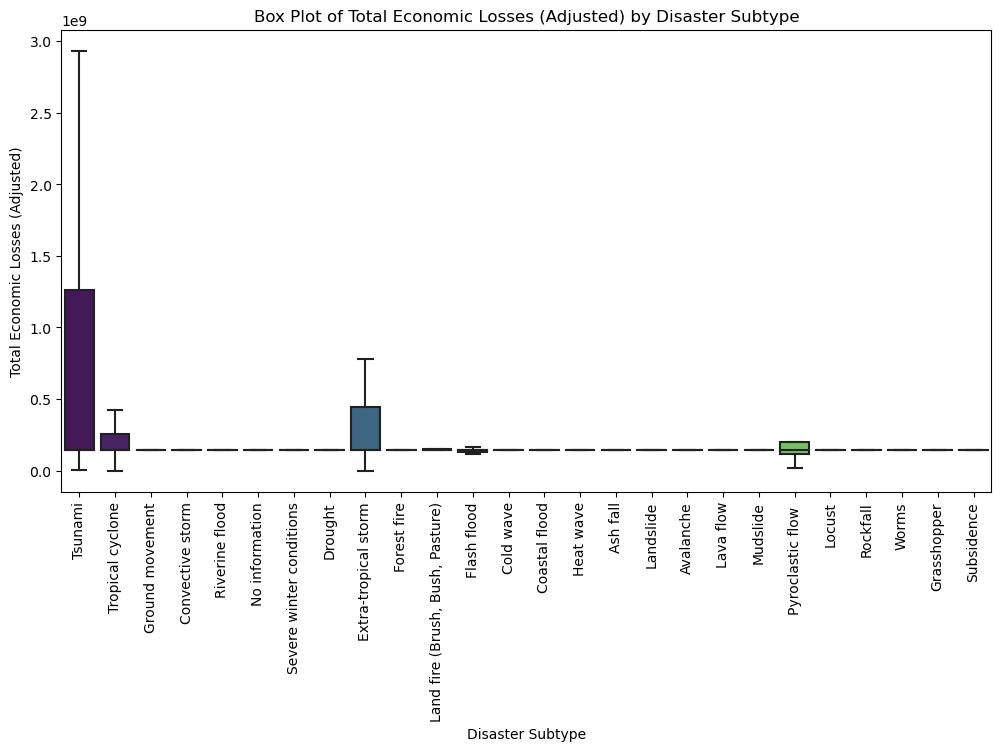

In [42]:
#Boxplot of Total Economic Losses by Disaster Subtype
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_01, x='Disaster Subtype', y='Total Damage (USD, adjusted)', palette='viridis', showfliers=False)
plt.ylabel('Total Economic Losses (Adjusted)')
plt.title('Box Plot of Total Economic Losses (Adjusted) by Disaster Subtype')
plt.xticks(rotation=90)
plt.show()